In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
os.environ["KAGGLE_USERNAME"] = kaggle_credentials["username"]
os.environ["KAGGLE_KEY"] = kaggle_credentials["key"]

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjuntejaswi/plant-village")

print("Path to dataset files:", path)

100%|██████████| 329M/329M [00:01<00:00, 197MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arjuntejaswi/plant-village/versions/1


In [ ]:
!ls

sample_data


In [ ]:
import shutil

# Source path (where Kaggle stored it)
src_path = "/root/.cache/kagglehub/datasets/arjuntejaswi/plant-village/versions/1"

# Destination path (where Colab shows files)
dst_path = "/content/plantvillage-dataset"



In [ ]:
import shutil

# Move dataset to /content
shutil.move("/root/.cache/kagglehub/datasets/arjuntejaswi/plant-village/versions/1", "/content/plantvillage-dataset")


'/content/plantvillage-dataset'

In [ ]:
import os

# Rename folder
os.rename("/content/plantvillage-dataset", "/content/plantvillage dataset")


In [ ]:
!mv /content/plantvillage\ dataset/PlantVillage/* /content/plantvillage\ dataset/


In [ ]:
!rm -r /content/plantvillage\ dataset/PlantVillage


In [ ]:
!rm -r /content/plantvillage\ dataset/Pepper__bell__Bacterial_* \
       /content/plantvillage\ dataset/Pepper__bell__healthy \
       /content/plantvillage\ dataset/Potato__Early_blight \
       /content/plantvillage\ dataset/Potato__Late_blight \
       /content/plantvillage\ dataset/Potato__healthy


rm: cannot remove '/content/plantvillage dataset/Pepper__bell__Bacterial_*': No such file or directory
rm: cannot remove '/content/plantvillage dataset/Pepper__bell__healthy': No such file or directory
rm: cannot remove '/content/plantvillage dataset/Potato__Early_blight': No such file or directory
rm: cannot remove '/content/plantvillage dataset/Potato__Late_blight': No such file or directory
rm: cannot remove '/content/plantvillage dataset/Potato__healthy': No such file or directory


In [ ]:
!ls "/content/plantvillage dataset"


Pepper__bell___Bacterial_spot  Tomato_Bacterial_spot  Tomato_Septoria_leaf_spot
Pepper__bell___healthy	       Tomato_Early_blight    Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Early_blight	       Tomato_healthy	      Tomato__Target_Spot
Potato___healthy	       Tomato_Late_blight     Tomato__Tomato_mosaic_virus
Potato___Late_blight	       Tomato_Leaf_Mold       Tomato__Tomato_YellowLeaf__Curl_Virus


In [ ]:
!find "/content/plantvillage dataset" -mindepth 1 -type d ! -iname "Tomato*" -exec rm -r {} +


(256, 256, 3)


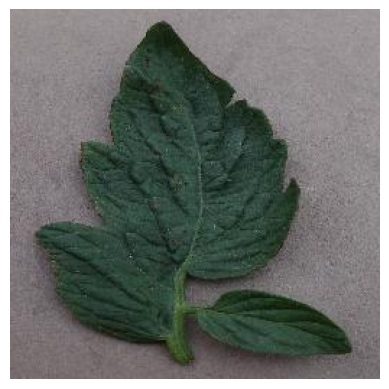

In [ ]:
# Dataset Path
base_dir = "plantvillage dataset"

image_path = "/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f28320d0b4a___FREC_C.Rust 3655.JPG"

# Read the image
img = mpimg.imread("/content/plantvillage dataset/Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")

print(img.shape)

# Display the image
plt.imshow(img)
plt.axis("off")  # Turn off axis numbers
plt.show()


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32


In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 12813 images belonging to 10 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 3198 images belonging to 10 classes.


In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,797,962 (182.33 MB)

 Trainable params: 47,797,962 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model_checkpoint.h5', save_best_only=True, monitor='val_accuracy', mode='max')

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint]  # Save best model
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5078 - loss: 2.6584

400/400 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.5082 - loss: 2.6548 - val_accuracy: 0.8201 - val_loss: 0.5086
Epoch 2/10
  1/400 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.8438 - loss: 0.3835

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


400/400 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.8438 - loss: 0.3835 - val_accuracy: 0.8349 - val_loss: 0.4761
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8720 - loss: 0.3704

400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.8720 - loss: 0.3704 - val_accuracy: 0.8542 - val_loss: 0.4290
Epoch 4/10
  1/400 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9375 - loss: 0.1679

400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9375 - loss: 0.1679 - val_accuracy: 0.8605 - val_loss: 0.4092
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9447 - loss: 0.1732

400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9447 - loss: 0.1732 - val_accuracy: 0.8791 - val_loss: 0.3764
Epoch 6/10
  1/400 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9688 - loss: 0.0738

400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9688 - loss: 0.0738 - val_accuracy: 0.8801 - val_loss: 0.3790
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.9756 - loss: 0.0760 - val_accuracy: 0.8532 - val_loss: 0.4988
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 1.0000 - loss: 0.0560 - val_accuracy: 0.8554 - val_loss: 0.5201
Epoch 9/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9826 - loss: 0.0627

400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.9826 - loss: 0.0627 - val_accuracy: 0.8848 - val_loss: 0.4470
Epoch 10/10
  1/400 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 1.0000 - loss: 0.0175

400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 0.8895 - val_loss: 0.4286


In [ ]:
# Model Evaluation
print("Evaluating model...")

val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8886 - loss: 0.4374
Validation Accuracy: 89.02%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


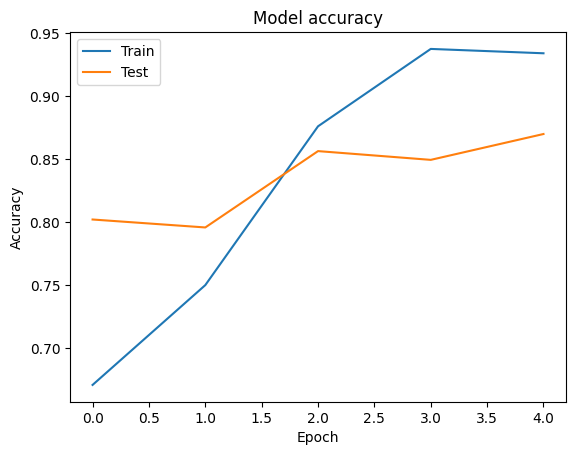

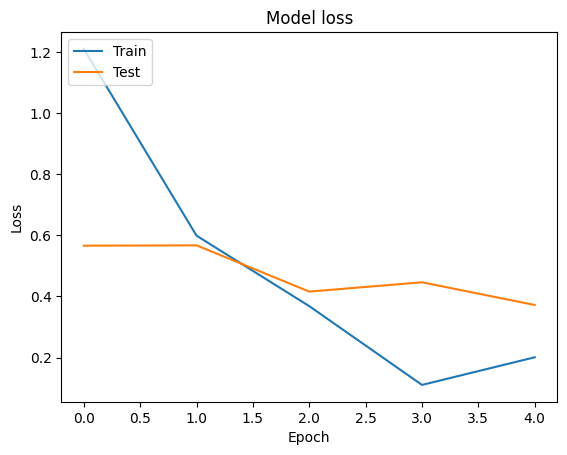

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:


# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.0
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [ ]:
class_indices

{0: 'Tomato_Bacterial_spot',
 1: 'Tomato_Early_blight',
 2: 'Tomato_Late_blight',
 3: 'Tomato_Leaf_Mold',
 4: 'Tomato_Septoria_leaf_spot',
 5: 'Tomato_Spider_mites_Two_spotted_spider_mite',
 6: 'Tomato__Target_Spot',
 7: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 8: 'Tomato__Tomato_mosaic_virus',
 9: 'Tomato_healthy'}

In [ ]:


# Saving the class names as a JSON file
json.dump(class_indices, open('class_indices.json', 'w'))


In [ ]:
# Save the trained model to Google Drive
# Ensure Google Drive is mounted (from google.colab import drive; drive.mount('/content/drive'))

# Change the save path to include the full Google Drive path
model.save('/content/drive/MyDrive/new.h5')

In [ ]:
import numpy as np
import random
from PIL import Image

# Get a batch of images and labels from the validation generator
images, labels = next(validation_generator)  # Fetch one batch

# Select a random index from the batch
random_index = random.randint(0, len(images) - 1)

# Get the random image and its corresponding label
test_image = images[random_index]
test_label = labels[random_index]  # One-hot encoded label

# Convert one-hot encoded label to class index
actual_class_index = np.argmax(test_label)

# Get the actual class name
actual_class_name = class_indices[actual_class_index]

# Save the image temporarily (if your function requires a file path)
test_image_pil = Image.fromarray((test_image * 255).astype(np.uint8))  # Convert from [0,1] to [0,255]
test_image_path = "/content/temp_test_image.jpg"
test_image_pil.save(test_image_path)

# Predict using your function
predicted_class_name = predict_image_class(model, test_image_path, class_indices)

# Compare predicted and actual class names
print(f"Actual Class Name: {actual_class_name}")
print(f"Predicted Class Name: {predicted_class_name}")

# Check if the prediction is correct
if predicted_class_name == actual_class_name:
    print("✅ Model classified correctly!")
else:
    print("❌ Model misclassified the image.")


NameError: name 'validation_generator' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
h5_model_path = "/content/drive/MyDrive/plant_disease_prediction_model.h5"
model = tf.keras.models.load_model(h5_model_path)


In [ ]:
import tensorflow as tf

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Optimize for size
tflite_model = converter.convert()

# Save the converted model
tflite_model_path = "/content/plant_disease_model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print("Conversion complete. Model saved as 'plant_disease_model.tflite'")


Saved artifact at '/tmp/tmpr4nock3f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135002420174416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135002420172304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135002420174992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135002420174800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135002420177104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135002420177872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135002420177296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135002420176336: TensorSpec(shape=(), dtype=tf.resource, name=None)
Conversion complete. Model saved as 'plant_disease_model.tflite'


In [ ]:
import shutil
shutil.move('/content/plant_disease_model.tflite', '/content/drive/MyDrive/plant_disease_model.tflite')

print("✅ .tflite model saved successfully in Google Drive!")


✅ .tflite model saved successfully in Google Drive!


In [ ]:
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/new.h5")

# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Ensure compatibility with TFLite 2.14.0 (Remove SELECT_TF_OPS)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

# Optional: Enable float16 quantization for better Raspberry Pi performance
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# Convert the model
tflite_model = converter.convert()

# Save model in Google Drive
tflite_model_path = "/content/drive/My Drive/new.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"Model saved as: {tflite_model_path}")


Saved artifact at '/tmp/tmpq67zn38m'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136751739889104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136751739885840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136751739882576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136751739890064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136751739889872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136751739890832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136751739890640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136751739891600: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as: /content/drive/My Drive/new.tflite


In [ ]:
import numpy as np
import random
from PIL import Image
import tensorflow.lite as tflite

# Load the TFLite model
interpreter = tflite.Interpreter(model_path="/content/drive/My Drive/new.tflite")
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Get a batch of images and labels from the validation generator
images, labels = next(validation_generator)  # Fetch one batch

# Select a random index from the batch
random_index = random.randint(0, len(images) - 1)

# Get the random image and its corresponding label
test_image = images[random_index]
test_label = labels[random_index]  # One-hot encoded label

# Convert one-hot encoded label to class index
actual_class_index = np.argmax(test_label)

# Get the actual class name
actual_class_name = class_indices[actual_class_index]

# Preprocess the image for TFLite model
test_image_resized = np.expand_dims(test_image, axis=0).astype(np.float32)  # Add batch dimension

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], test_image_resized)

# Run inference
interpreter.invoke()

# Get the predicted class index
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class_index = np.argmax(output_data)

# Get the predicted class name
predicted_class_name = class_indices[predicted_class_index]

# Compare predicted and actual class names
print(f"Actual Class Name: {actual_class_name}")
print(f"Predicted Class Name: {predicted_class_name}")

# Check if the prediction is correct
if predicted_class_name == actual_class_name:
    print("✅ Model classified correctly!")
else:
    print("❌ Model misclassified the image.")


Actual Class Name: Tomato__Tomato_YellowLeaf__Curl_Virus
Predicted Class Name: Tomato__Tomato_YellowLeaf__Curl_Virus
✅ Model classified correctly!
